In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use("ggplot")

(200, 2)


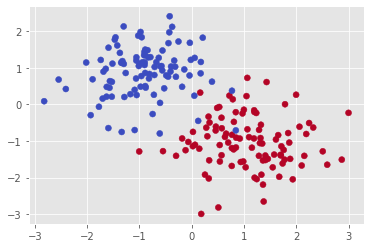

In [4]:
N = 100
mu1 = [1,-1]
sigma1 = np.eye(2) * 0.5
data1 = np.random.multivariate_normal(mu1, sigma1, N)
mu2 = [-1,1]
sigma2 = np.eye(2) * 0.5
data2 = np.random.multivariate_normal(mu2, sigma2, N)

data = np.concatenate([data1, data2])
print(data.shape)
train_t = np.concatenate([np.repeat(1,N), np.repeat(-1,N)])
plt.scatter(data[:,0], data[:,1], c=train_t, cmap=cm.coolwarm)
plt.show()

ヒンジ型誤差関数の逐次処理

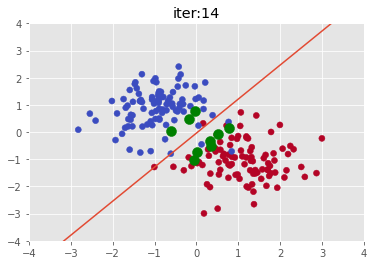

In [19]:
def plot_scatter(x,y):
  plt.plot(x,y)
  plt.scatter(data[:,0], data[:,1], c=train_t, cmap=cm.coolwarm)
  plt.scatter(data[:,0][support_vector], data[:,1][support_vector], s=100, c="green")
  plt.title(f"iter:{i}")
  plt.xlim(-4,4)
  plt.ylim(-4,4)
  plt.show()

w = np.array([1,1,1], "float64")
e = 0.01
lam = 0.001
train_X = np.c_[np.repeat(1, 2*N), data] #(N, 2+1)

for i in range(100):
  y = train_X@w
  updata = y*train_t <= 1

  w_ = w

  for X, t in zip(train_X[updata], train_t[updata]):
    dE = - X*t + 2 * lam * w
    w = w - e*dE

  for X, t in zip(train_X[~updata], train_t[~updata]):
    dE = 2 * lam * w
    w = w - e*dE

  x_ = np.linspace(-4, 4)
  y_ = - w[1] * x_ / w[2] - w[0] / w[2]

  if np.linalg.norm(w_ - w) / np.linalg.norm(w) < 0.01:
        support_vector = (y * train_t < 1.3) & (y * train_t >= 1)
        plot_scatter(x_, y_)
        break